In [323]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 計算出平均年齡、老年人口比例、所得中位數，觀察台灣各鄉鎮市是否有"又老又窮"的現象


### 相關資料
* 2018年12月鄉鎮市區單一年齡人口數
* 2016年鄉鎮市區綜合所得稅所得總額申報統計




### 讀檔

In [324]:
pop2018= pd.read_excel("2018年12月鄉鎮市區單一年齡人口數.xlsx")

In [325]:
pop2018.head()

,COUNTY,TOWN,COUNTY_ID,TOWN_ID,年齡,男,女
0,連江縣,南竿鄉,9007,9007010,0,36,37
1,連江縣,南竿鄉,9007,9007010,1,45,33
2,連江縣,南竿鄉,9007,9007010,2,42,32
3,連江縣,南竿鄉,9007,9007010,3,39,40
4,連江縣,南竿鄉,9007,9007010,4,36,43


In [326]:
pop2018=pop2018.drop("COUNTY_ID",axis=1)
pop2018.head()

,COUNTY,TOWN,TOWN_ID,年齡,男,女
0,連江縣,南竿鄉,9007010,0,36,37
1,連江縣,南竿鄉,9007010,1,45,33
2,連江縣,南竿鄉,9007010,2,42,32
3,連江縣,南竿鄉,9007010,3,39,40
4,連江縣,南竿鄉,9007010,4,36,43


### 平均年齡
* 平均年齡=(各年齡組的組中值×各年齡組人數)之和/人口總數。

In [327]:
pop2018['人口總數(男加女)']=pop2018.男+pop2018.女
pop2018.head()

,COUNTY,TOWN,TOWN_ID,年齡,男,女,人口總數(男加女)
0,連江縣,南竿鄉,9007010,0,36,37,73
1,連江縣,南竿鄉,9007010,1,45,33,78
2,連江縣,南竿鄉,9007010,2,42,32,74
3,連江縣,南竿鄉,9007010,3,39,40,79
4,連江縣,南竿鄉,9007010,4,36,43,79


In [328]:
pop2018['年齡(new)']=pop2018.年齡+0.5
pop2018=pop2018.drop("年齡",axis=1)

pop2018.head()

,COUNTY,TOWN,TOWN_ID,男,女,人口總數(男加女),年齡(new)
0,連江縣,南竿鄉,9007010,36,37,73,0.5
1,連江縣,南竿鄉,9007010,45,33,78,1.5
2,連江縣,南竿鄉,9007010,42,32,74,2.5
3,連江縣,南竿鄉,9007010,39,40,79,3.5
4,連江縣,南竿鄉,9007010,36,43,79,4.5


### 各年齡組的組中值×各年齡組人數(以下簡稱a)

In [329]:
pop2018['a']=pop2018['年齡(new)']*pop2018['人口總數(男加女)']
pop2018.head()

,COUNTY,TOWN,TOWN_ID,男,女,人口總數(男加女),年齡(new),a
0,連江縣,南竿鄉,9007010,36,37,73,0.5,36.5
1,連江縣,南竿鄉,9007010,45,33,78,1.5,117.0
2,連江縣,南竿鄉,9007010,42,32,74,2.5,185.0
3,連江縣,南竿鄉,9007010,39,40,79,3.5,276.5
4,連江縣,南竿鄉,9007010,36,43,79,4.5,355.5


In [330]:
pop2018_new=pop2018.groupby(['TOWN_ID','COUNTY','TOWN']).sum()
pop2018_new.head()

,,,男,女,人口總數(男加女),年齡(new),a
TOWN_ID,COUNTY,TOWN,,,,,
9007010,連江縣,南竿鄉,4304,3359,7663,5100.5,308876.5
9007020,連江縣,北竿鄉,1353,1072,2425,5100.5,102652.5
9007030,連江縣,莒光鄉,989,629,1618,5100.5,72149.0
9007040,連江縣,東引鄉,802,548,1350,5100.5,51967.0
9020010,金門縣,金城鎮,21565,21760,43325,5100.5,1848279.5


In [331]:
pop2018_new['平均年齡']=pop2018_new['a']/pop2018_new['人口總數(男加女)']
pop2018_new=pop2018_new.drop(['男','女'],axis=1)
pop2018_new.head()

,,,人口總數(男加女),年齡(new),a,平均年齡
TOWN_ID,COUNTY,TOWN,,,,
9007010,連江縣,南竿鄉,7663,5100.5,308876.5,40.307517
9007020,連江縣,北竿鄉,2425,5100.5,102652.5,42.330928
9007030,連江縣,莒光鄉,1618,5100.5,72149.0,44.591471
9007040,連江縣,東引鄉,1350,5100.5,51967.0,38.494074
9020010,金門縣,金城鎮,43325,5100.5,1848279.5,42.660808


### 所得中位數

In [332]:
tax= pd.read_excel("105年綜合所得稅所得總額申報統計_鄉鎮市區.xlsx")
tax.head()
tax=tax[['鄉鎮市區代碼','縣市名稱','鄉鎮市區名稱','中位數']]
tax.columns = ['TOWN_ID','COUNTY','TOWN','中位數']
tax.head()



,TOWN_ID,COUNTY,TOWN,中位數
0,9007010,連江縣,南竿鄉,795
1,9007020,連江縣,北竿鄉,703
2,9007030,連江縣,莒光鄉,752
3,9007040,連江縣,東引鄉,864
4,9020010,金門縣,金城鎮,718


In [333]:
pop2018_new = pd.merge(pop2018_new, tax,left_on='TOWN_ID',right_on='TOWN_ID')

pop2018_new.head()

,TOWN_ID,人口總數(男加女),年齡(new),a,平均年齡,COUNTY,TOWN,中位數
0,9007010,7663,5100.5,308876.5,40.307517,連江縣,南竿鄉,795
1,9007020,2425,5100.5,102652.5,42.330928,連江縣,北竿鄉,703
2,9007030,1618,5100.5,72149.0,44.591471,連江縣,莒光鄉,752
3,9007040,1350,5100.5,51967.0,38.494074,連江縣,東引鄉,864
4,9020010,43325,5100.5,1848279.5,42.660808,金門縣,金城鎮,718


### 老年人口比例
* 老年人口比例=老年人口/人口總數

In [334]:
oldpop=pop2018[pop2018['年齡(new)']>65]
oldpop.head()


,COUNTY,TOWN,TOWN_ID,男,女,人口總數(男加女),年齡(new),a
65,連江縣,南竿鄉,9007010,44,28,72,65.5,4716.0
66,連江縣,南竿鄉,9007010,39,27,66,66.5,4389.0
67,連江縣,南竿鄉,9007010,37,17,54,67.5,3645.0
68,連江縣,南竿鄉,9007010,35,19,54,68.5,3699.0
69,連江縣,南竿鄉,9007010,27,19,46,69.5,3197.0


In [335]:
oldpop=oldpop.groupby(['TOWN_ID','COUNTY','TOWN']).sum()
oldpop.head()

,,,男,女,人口總數(男加女),年齡(new),a
TOWN_ID,COUNTY,TOWN,,,,,
9007010,連江縣,南竿鄉,428,376,804,2988.0,60167.0
9007020,連江縣,北竿鄉,174,155,329,2988.0,24113.5
9007030,連江縣,莒光鄉,119,102,221,2988.0,16416.5
9007040,連江縣,東引鄉,60,53,113,2988.0,8258.5
9020010,金門縣,金城鎮,2736,2919,5655,2988.0,419728.5


In [336]:
oldpop=oldpop.drop(['男','女','a','年齡(new)'],axis=1)
oldpop=oldpop.rename(columns={'人口總數(男加女)':'老年人口總數(男加女)'})


oldpop.head()

,,,老年人口總數(男加女)
TOWN_ID,COUNTY,TOWN,
9007010,連江縣,南竿鄉,804
9007020,連江縣,北竿鄉,329
9007030,連江縣,莒光鄉,221
9007040,連江縣,東引鄉,113
9020010,金門縣,金城鎮,5655


### 合併dataframe

In [337]:
pop2018_new = pd.merge(pop2018_new, oldpop,left_on='TOWN_ID',right_on='TOWN_ID')
pop2018_new.head()

,TOWN_ID,人口總數(男加女),年齡(new),a,平均年齡,COUNTY,TOWN,中位數,老年人口總數(男加女)
0,9007010,7663,5100.5,308876.5,40.307517,連江縣,南竿鄉,795,804
1,9007020,2425,5100.5,102652.5,42.330928,連江縣,北竿鄉,703,329
2,9007030,1618,5100.5,72149.0,44.591471,連江縣,莒光鄉,752,221
3,9007040,1350,5100.5,51967.0,38.494074,連江縣,東引鄉,864,113
4,9020010,43325,5100.5,1848279.5,42.660808,金門縣,金城鎮,718,5655


In [338]:
pop2018_new['老年人口比例']=(pop2018_new['老年人口總數(男加女)']/pop2018_new['人口總數(男加女)'])*100
pop2018_new.head()


,TOWN_ID,人口總數(男加女),年齡(new),a,平均年齡,COUNTY,TOWN,中位數,老年人口總數(男加女),老年人口比例
0,9007010,7663,5100.5,308876.5,40.307517,連江縣,南竿鄉,795,804,10.491974
1,9007020,2425,5100.5,102652.5,42.330928,連江縣,北竿鄉,703,329,13.567010
2,9007030,1618,5100.5,72149.0,44.591471,連江縣,莒光鄉,752,221,13.658838
3,9007040,1350,5100.5,51967.0,38.494074,連江縣,東引鄉,864,113,8.370370
4,9020010,43325,5100.5,1848279.5,42.660808,金門縣,金城鎮,718,5655,13.052510


### 畫圖

Text(0, 0.5, '所得中位數')

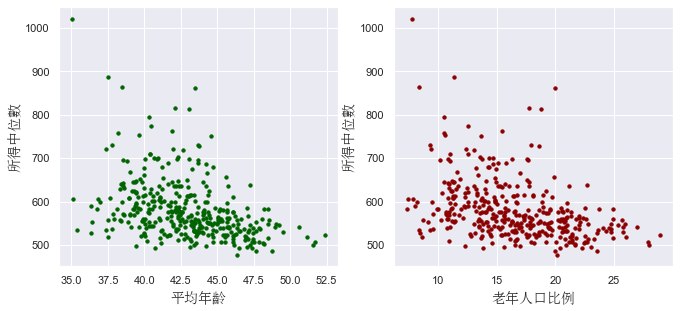

In [339]:
plt.figure(figsize=(11,10.5))
import seaborn as sns
sns.set()
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14) 

plt.subplot(221)
plt.scatter(pop2018_new.平均年齡,pop2018_new.中位數,c='DarkGreen',s=11)
plt.xlabel('平均年齡', fontproperties=font)
plt.ylabel("所得中位數", fontproperties=font)



plt.subplot(222)
plt.scatter(pop2018_new.老年人口比例,pop2018_new.中位數,c='DarkRed',s=11)
plt.xlabel('老年人口比例', fontproperties=font)
plt.ylabel("所得中位數", fontproperties=font)



### 觀察上方兩張圖，可看出平均年齡越高之地區，其所得中位數偏低；同樣的，在老年比例和中位數的圖表中，也能看出相同的趨勢。由此，可得証台灣各鄉鎮區存在又老又窮之現象。